<b>Support vector machines (SVMs)</b> are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

Effective in high dimensional spaces.

Still effective in cases where number of dimensions is greater than the number of samples.

Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

The support vector machines in scikit-learn support both dense (numpy.ndarray and convertible to that by numpy.asarray) and sparse (any scipy.sparse) sample vectors as input. However, to use an SVM to make predictions for sparse data, it must have been fit on such data. For optimal performance, use C-ordered numpy.ndarray (dense) or scipy.sparse.csr_matrix (sparse) with dtype=float64.
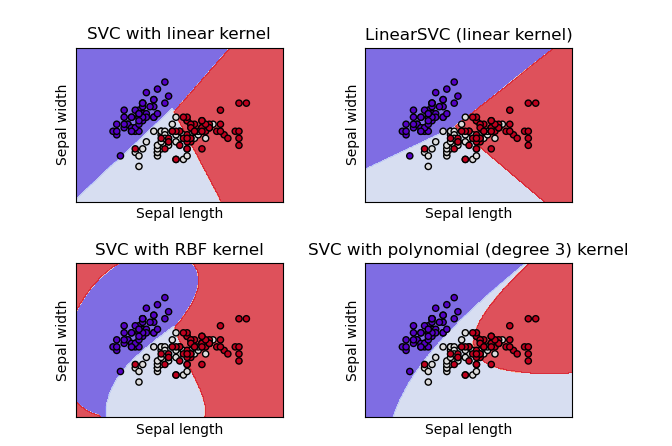
<font color='cyan'><b>Source</b></font> : https://scikit-learn.org/stable/modules/svm.html

# <font color='burgundy'><b>Support vector machine for regression (SVR)</b></font>

In [72]:
## import support vector classifier from scikitlearn
from sklearn.svm import SVR
## load the California housing dataset
from sklearn.datasets import load_boston
boston_data = load_boston()
## split data into dependent and independent 
X = boston_data.data
y = boston_data.target
boston_data


/home/balha/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [30]:
## split train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40,shuffle=True)


In [76]:
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
MEDV = y
df['MEDV'] = MEDV

In [77]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<font size ='4' color = 'gray'> class </font> <font size='3' >sklearn.svm.SVR(kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, tol=0.001,
C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False,
max_iter=-1) </font> 

<b> *Parameters* </b>
- kernel : Specifies the kernel type to be used in the algorithm.(default = 'rbf')
- degree : Degree of the polynomial kernel function (default=3)
- gamma : Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.(default = auto )
- coef : dependent term in kernel function. It is only significant
in ‘poly’ and ‘sigmoid’.(default=0.0)
- C : Penalty parameter C of the error term. (default=1.0)
- epsilon : Epsilon in the epsilon-SVR model. It specifies the
epsilon-tube within which no penalty is associated in the training loss function with points
predicted within a distance epsilon from the actual value.(default=0.1)
- shrinking : Whether to use the shrinking heuristic. (default = True)
- cache_size : Specify the size of the kernel cache (in MB) 
- max_iter :Hard limit on iterations within solver, or -1 for no limit(default=-1)

In [34]:
SVR_model_rbf = SVR(kernel='rbf',gamma=0.1) ## kernel = 'rbf'
SVR_model_linear = SVR(C=0.1,epsilon=0.1,kernel='linear') ## kernel = 'rbf'
SVR_model_sigmoid = SVR(C=0.1,epsilon=0.1,kernel='sigmoid') ## kernel = 'rbf'
SVR_model_poly = SVR(C=0.1,epsilon=0.1,kernel='poly') ## kernel = 'rbf'


## Using SVR with rbf kernel

In [50]:
from sklearn.linear_model import LinearRegression
import time
# fit the model with 'rbf' kernel
SVR_model_rbf.fit(X_train,y_train)
SVR_model_linear.fit(X_train,y_train)
lr = LinearRegression()


In [79]:
predictors = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']
target = df['MEDV']

In [80]:
def launch_model(name,model, X_train, y_train, X_test, y_test):
    start = time.time()
    model.fit(X_train[predictors], y_train)
    y_pred = model.predict(X_test[predictors])
    ypred_train = model.predict(X_train[predictors])
    print ('MSE train', mean_absolute_error(y_train, ypred_train))
    print ('MSE test', mean_absolute_error(y_test, y_pred))
    r_2 = model.score(X_test[predictors], y_test)
    print ('R^2 test', r_2)
    print('Tiempo de ejecución: {0:.2f} segundos.'.format(time.time() - start))
    return name + '($R^2={:.3f}$)'.format(r_2), np.array(y_test), y_pred

In [81]:
results = []
print ('-----------')
print ('SVR - RBF')
print ('-----------')
results.append(launch_model('SVR - RBF', SVR_model_rbf, X_train, y_train, X_test, y_test))
print ('-----------')
print ('SVR - lineal')
print ('-----------')
results.append(launch_model('SVR - lineal', SVR_model_linear, X_train, y_train, X_test, y_test))
print ('-----------')
print ('Regresion lineal')
print ('-----------')
results.append(launch_model('Regresion lineal', lr, X_train, y_train, X_test, y_test))

-----------
SVR - RBF
-----------


<ipython-input-80-87e8c6220805>:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  model.fit(X_train[predictors], y_train)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [28]:
#  Prediction
y_pred = SVR_model_rbf.predict(X_test)
print('prediction is : ' , y_pred[:10])

prediction is :  [16.69886476 22.81467323 23.27232456 13.91490407 16.92260293 16.41458432
 23.50888452 20.01283817 19.85861977 13.99968074]


In [36]:
## train and test score SVR with rbf
print('Train Score is : ' , SVR_model_rbf.score(X_train, y_train))
print('Test Score is : ' , SVR_model_rbf.score(X_test, y_test))

Train Score is :  0.1462549180430318
Test Score is :  0.01538887285362378


In [40]:
## train and test score SVR with rbf
print('Train Score is : ' , SVR_model_rbf.score(X_train, y_train))
print('Test Score is : ' , SVR_model_rbf.score(X_test, y_test))

Train Score is :  0.7198997943147643
Test Score is :  0.6557397889604883


In [21]:
## calculate ERROR

from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )

Mean Absolute Error Value is :  6.6760859483048725
Mean Squared Error Value is :  99.197956234983
Median Squared Error Value is :  4.45958273374284


## Using model with Linear kernel

In [41]:
SVR_model_linear.fit(X_train,y_train)

SVR(C=0.1, kernel='linear')

In [42]:
#  Prediction
y_pred = SVR_model_linear.predict(X_test)
print('prediction is : ' , y_pred[:10])

prediction is :  [20.87591744 30.92462707  8.47981942 15.8586241  16.63892931 27.55441524
 26.16729997 15.72549041 22.22569331 -5.0811416 ]


In [43]:
## train and test score SVR with rbf
print('Train Score is : ' , SVR_model_linear.score(X_train, y_train))
print('Test Score is : ' , SVR_model_linear.score(X_test, y_test))

Train Score is :  0.7198997943147643
Test Score is :  0.6557397889604883


In [44]:
## calculate ERROR

from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )

Mean Absolute Error Value is :  4.053929489321248
Mean Squared Error Value is :  39.048389126286075
Median Squared Error Value is :  2.487271502554721


https://www.kaggle.com/puxama/support-vector-regression-boston-data

# <font color='burgundy'><b>Support vector machine for classification (SVC)</b></font>